In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('superstore.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit Ratio       9994 non-null   object 
 1   Category           9994 non-null   object 
 2   City               9994 non-null   object 
 3   Country            9994 non-null   object 
 4   Customer Name      9994 non-null   object 
 5   Discount           9994 non-null   object 
 6   Number of Records  9994 non-null   int64  
 7   Order Date         9994 non-null   object 
 8   Order ID           9994 non-null   object 
 9   Postal Code        9983 non-null   float64
 10  Manufacturer       9994 non-null   object 
 11  Product Name       9994 non-null   object 
 12  Profit             9994 non-null   object 
 13  Quantity           9994 non-null   int64  
 14  Region             9994 non-null   object 
 15  Sales              9994 non-null   object 
 16  Segment            9994 

In [12]:
data['Time'] = pd.to_datetime(data['Order Date']).dt.to_period('m')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Profit Ratio       9994 non-null   object   
 1   Category           9994 non-null   object   
 2   City               9994 non-null   object   
 3   Country            9994 non-null   object   
 4   Customer Name      9994 non-null   object   
 5   Discount           9994 non-null   object   
 6   Number of Records  9994 non-null   int64    
 7   Order Date         9994 non-null   object   
 8   Order ID           9994 non-null   object   
 9   Postal Code        9983 non-null   float64  
 10  Manufacturer       9994 non-null   object   
 11  Product Name       9994 non-null   object   
 12  Profit             9994 non-null   object   
 13  Quantity           9994 non-null   int64    
 14  Region             9994 non-null   object   
 15  Sales              9994 non-null   obj

In [16]:
total = []

for item in data['Sales']:
    k = str(item)[1:]
    k = k.replace(',', '')
    total.append(int(k, base=10))

data['SalesN'] = pd.Series(total) 

In [17]:
total_sales = data[['Time', 'SalesN']].groupby('Time', as_index=False).agg('sum')
total_sales.head()

,Time,SalesN
0,2015-01,14238
1,2015-02,4518
2,2015-03,55689
3,2015-04,28294
4,2015-05,23648


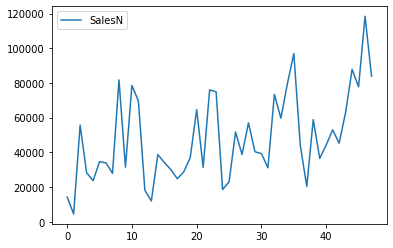

In [18]:
total_sales.plot.line()